In [3]:
# Import Dependencies
import pandas as pd

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import os

from itertools import product
from itertools import permutations



I did not have time to build the code to import the SQL file, but I did import the CSVs and created the visuals.


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<your_db_name>')
connection = engine.connect()


In [4]:
employees_df = pd.read_csv('data\employees.csv', delimiter = ',')


In [6]:
salaries_df = pd.read_csv('data\salaries.csv', delimiter = ',')


In [12]:
combo_df = pd.concat([employees_df, salaries_df], axis=1, join='inner')

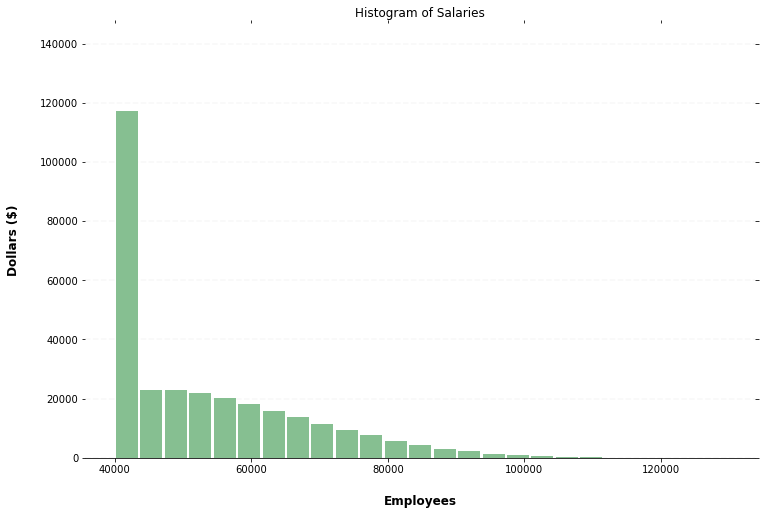

In [17]:
ax = combo_df.hist(column='salary', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram of Salaries")

    # Set x-axis label
    x.set_xlabel("Employees", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Dollars ($)", labelpad=20, weight='bold', size=12)

    # Format y-axis label
  

In [24]:
combo_df.tail(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary
300014,81057,e0003,11/3/1957,Patricio,Pocchiola,M,2/16/1985,499990,40000
300015,26881,s0001,9/28/1952,Jiafu,Petersohn,M,6/27/1991,499991,43612
300016,99439,s0001,2/2/1963,Mahmut,Manders,M,9/26/1985,499992,43005
300017,225587,s0002,8/5/1952,Chenyi,Orlowska,M,12/25/1986,499993,40000
300018,229498,e0002,12/6/1952,Jagoda,Molberg,F,1/2/1987,499994,40000
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,499995,40000
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,499996,58058
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,499997,49597
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,499998,40000
300023,464503,s0002,5/31/1964,Arvind,Slobodova,M,11/23/1987,499999,63707
